### Pokemon Project Feedback :

Make a list of the problems and issues you had with the Pokemon prject. Do it in the Markdown format in the same cell here and make sure the list is clean and explanatory !

# Sleep data :

## Part 1: warm up !

### Download and import data from: 

    https://www.dropbox.com/s/mtwl4nyo3lp00gy/sleepdata.csv?dl=0


### Bedtime Hours:

What is  most common hours? You can make a histogram of bedtime hour !


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
data = pd.read_csv("sleepdata.csv", delimiter=";", keep_default_na=False)
df=data


In [119]:
data.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2011-06-19 08:42:08,2011-06-19 13:22:13,51%,4:40,,,,0
1,2011-06-29 07:27:53,2011-06-29 12:39:43,57%,5:11,,,,0
2,2011-06-30 08:04:06,2011-06-30 10:51:15,34%,2:47,,,,0
3,2011-07-04 05:48:35,2011-07-04 12:27:00,73%,6:38,,,,0
4,2011-07-05 05:46:29,2011-07-05 10:42:00,51%,4:55,,,,0


In [120]:
data.dtypes


Start               object
End                 object
Sleep quality       object
Time in bed         object
Wake up             object
Sleep Notes         object
Heart rate          object
Activity (steps)     int64
dtype: object

In [121]:
temp = pd.DatetimeIndex(data['Start'])
data['Start_Date'] = temp.date
data['Start_Time'] = temp.time



In [122]:
data.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Start_Date,Start_Time
0,2011-06-19 08:42:08,2011-06-19 13:22:13,51%,4:40,,,,0,2011-06-19,08:42:08
1,2011-06-29 07:27:53,2011-06-29 12:39:43,57%,5:11,,,,0,2011-06-29,07:27:53
2,2011-06-30 08:04:06,2011-06-30 10:51:15,34%,2:47,,,,0,2011-06-30,08:04:06
3,2011-07-04 05:48:35,2011-07-04 12:27:00,73%,6:38,,,,0,2011-07-04,05:48:35
4,2011-07-05 05:46:29,2011-07-05 10:42:00,51%,4:55,,,,0,2011-07-05,05:46:29


In [123]:
data['year']= pd.DatetimeIndex(data['Start_Date'])
data['month']= pd.DatetimeIndex(data['Start_Date']).month
data['day']= pd.DatetimeIndex(data['Start_Date']).day
data.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Start_Date,Start_Time,year,month,day
0,2011-06-19 08:42:08,2011-06-19 13:22:13,51%,4:40,,,,0,2011-06-19,08:42:08,2011-06-19,6,19
1,2011-06-29 07:27:53,2011-06-29 12:39:43,57%,5:11,,,,0,2011-06-29,07:27:53,2011-06-29,6,29
2,2011-06-30 08:04:06,2011-06-30 10:51:15,34%,2:47,,,,0,2011-06-30,08:04:06,2011-06-30,6,30
3,2011-07-04 05:48:35,2011-07-04 12:27:00,73%,6:38,,,,0,2011-07-04,05:48:35,2011-07-04,7,4
4,2011-07-05 05:46:29,2011-07-05 10:42:00,51%,4:55,,,,0,2011-07-05,05:46:29,2011-07-05,7,5


In [124]:
data.dtypes


Start                       object
End                         object
Sleep quality               object
Time in bed                 object
Wake up                     object
Sleep Notes                 object
Heart rate                  object
Activity (steps)             int64
Start_Date                  object
Start_Time                  object
year                datetime64[ns]
month                        int64
day                          int64
dtype: object

In [38]:
data.isnull().sum()

Start               0
End                 0
Sleep quality       0
Time in bed         0
Wake up             0
Sleep Notes         0
Heart rate          0
Activity (steps)    0
Start_Date          0
Start_Time          0
year                0
month               0
day                 0
dtype: int64

In [39]:
data.dtypes

Start               object
End                 object
Sleep quality       object
Time in bed         object
Wake up             object
Sleep Notes         object
Heart rate          object
Activity (steps)     int64
Start_Date          object
Start_Time          object
year                 int64
month                int64
day                  int64
dtype: object

In [125]:
data['Start'] = pd.to_datetime(data.Start)
data['End'] = pd.to_datetime(data.End)
data['sleeptime'] = pd.to_datetime(data['Time in bed'])
data['Start_Date'] = pd.to_datetime(data.Start_Date)


In [126]:
StartHour = data.Start.dt.hour
Endtime = data.End.dt.hour


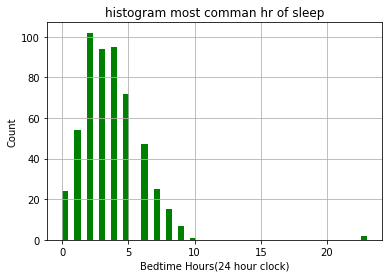

In [127]:
plt.hist(StartHour, bins= 50, color='Green')
plt.xlabel('Bedtime Hours(24 hour clock)')
plt.ylabel('Count')
plt.title('histogram most comman hr of sleep')
plt.grid(True)
plt.show()

### Conclusion ?

What does the plot show about the sleep pattern ?

Clearly, I should be sleeping earlier. According to this graph, the most common hour I fall asleep is 2 in the morning. However, I should be mindful of bias since I am less likely to initialize the Sleep Cycle app when I’m super tired - as is often the case when I fall asleep before midnight.

### Sleep Duration:

How long slept for when fell asleep. 

Can plot a histogram based on minutes of sleep

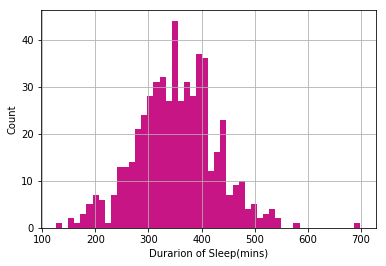

In [128]:
Time_hours = []
for x in (data['Time in bed'].str.split(':').str[0]):
    x = int(x)
    Time_hours.append(x)

Hours_2 = []
for x in Time_hours:
    Hours_2.append(x*60)

Minutes = []
for y in (data['Time in bed'].str.split(':').str[1]):
    y = int(y)
    Minutes.append(y)
TimeSleeping = [int(Hours_2[i])+int(Minutes[i]) for i in range(len(Hours_2))]

plt.hist(TimeSleeping, 50, color='mediumvioletred')
plt.xlabel('Durarion of Sleep(mins)')
plt.ylabel('Count')
plt.grid(True)

### Conclusion ?

An approximately normal distribution as expected with the large sample size. On average, I slept about 355 minutes, or 5 hours and 55 minutes per night. Take note that the mean is pulled up by an outlier, the result of a 12 hour hibernation on a warm summer night last year.

### Sleep Duration Over Time:

How has the duration of changed over time ?

__Note that you might want to fit a regression curve to the scatter plot you make !__

__Now modify your plot to include sleep quality as a new dimension !__

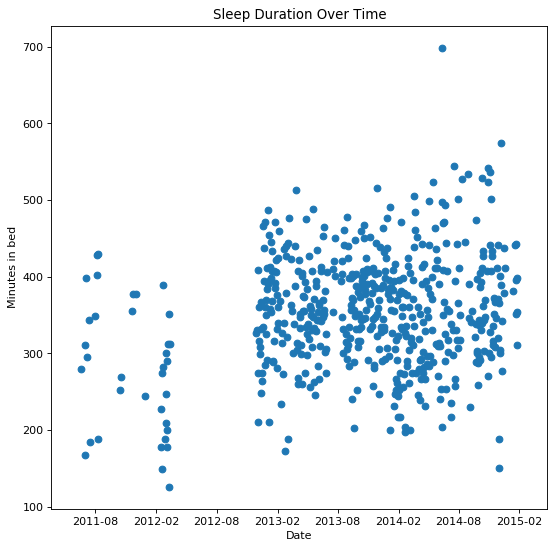

In [129]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(data['year'].tolist(), TimeSleeping)

plt.title('Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes in bed')
plt.show()

In [156]:
new_data = data['year'].map(lambda x: x.year) == 2013


In [157]:
data1=  df[new_data]
data1.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Start_Date,Start_Time,year,month,day,sleeptime
61,2013-01-01 08:42:34,2013-01-01 13:35:22,48%,4:52,,,,0,2013-01-01,08:42:34,2013-01-01,1,1,2018-04-13 04:52:00
62,2013-01-02 03:36:40,2013-01-02 11:43:56,90%,8:07,,,,0,2013-01-02,03:36:40,2013-01-02,1,2,2018-04-13 08:07:00
63,2013-01-03 04:37:42,2013-01-03 11:08:05,72%,6:30,,,,0,2013-01-03,04:37:42,2013-01-03,1,3,2018-04-13 06:30:00
64,2013-01-06 03:02:50,2013-01-06 10:37:40,53%,7:34,,,,0,2013-01-06,03:02:50,2013-01-06,1,6,2018-04-13 07:34:00
65,2013-01-07 07:57:40,2013-01-07 11:27:41,38%,3:30,,,,0,2013-01-07,07:57:40,2013-01-07,1,7,2018-04-13 03:30:00


In [168]:
data1['month2013']= pd.DatetimeIndex(data1['year']).month


C:\Users\Administrator\.anaconda\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
sleepduration = (data1.sleeptime.dt.hour * 60) +  data1.sleeptime.dt.minute


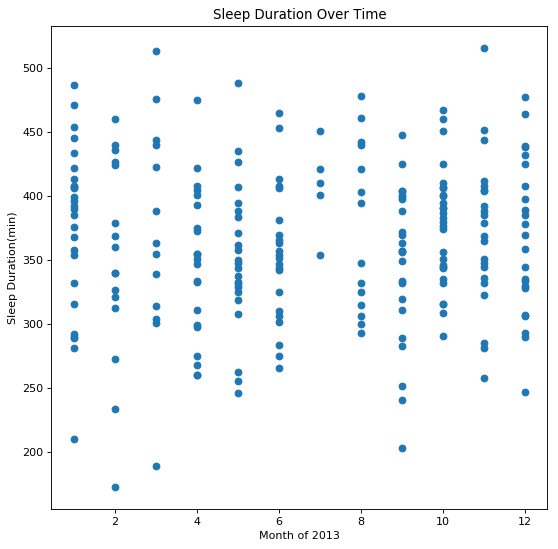

In [170]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(data1['month2013'] ,sleepduration)

plt.title('Sleep Duration Over Time')
plt.xlabel('Month of 2013')
plt.ylabel("Sleep Duration(min)")
plt.show()

### Conclusion ?

Can you notice any change around August 2013 ?


### Sleep Quality Over Time:

Sleep Quality is affected by two factors:

    - Total time asleep
    - Amount of movement


Since we don’t have access to the movement data, we can’t verify the relationship between movement and sleep quality. 

However, we can check the relationship between sleep duration and sleep quality. Create a visualization of that !

In [176]:
sleepduration = (data.sleeptime.dt.hour * 60) +  data.sleeptime.dt.minute
sleepduration.head(5)

0    280
1    311
2    167
3    398
4    295
Name: sleeptime, dtype: int64

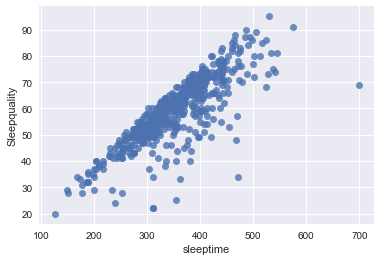

In [177]:
ls = []
for x in data['Sleep quality']:
    x = x.split('%')
    x = x[0]
    x = int(x)
    ls.append(x)

data['Sleepquality']=ls   

sns.set()
sns.regplot(sleepduration, data['Sleepquality'],fit_reg= False)

### Does duration mean quality ?

Given this information, it is possible for sleep quality to increase even when sleep duration decreases, especially if there is less movement in bed ! S


 plot sleep quality over time to find out if this is true !

In [ ]:
#![title](img/5.png)

## Part 2: A similar realistic situation:

- Lets conisder a similar where we have got sleep data from a devices. Expand on what you did above and come with extra analysis of yours. Make conclusions based on your observations

- ownload the data: https://www.dropbox.com/s/7fdmc0l3410g8hu/sleep-export2.csv?dl=0

- Here are some extra info you might need:
     - http://developer.samsung.com/health/server/api/data-types/sleep
     - http://developer.samsung.com/onlinedocs/health/index.html?com/samsung/android/sdk/healthdata/HealthConstants.Sleep.html

    - https://currentmillis.com/tutorials/system-currentTimeMillis.html#utc

In [65]:
data1 = pd.read_csv("sleep-export2 (1).csv", delimiter=",",keep_default_na=False)
data1.head(10)

,time_offset,end_time,pkg_name,start_time,custom,comment,datauuid,deviceuuid,update_time,create_time
0,-18000000,53:00.0,com.sec.android.app.shealth,02:00.0,,,1d4fb447-0895-51fb-9ce9-d087a50674c0,F/D7+hL5E5,08:04.8,08:04.8
1,-18000000,42:00.0,com.sec.android.app.shealth,31:00.0,,,9910f6c6-236f-dc17-b27f-c45497588ebe,F/D7+hL5E5,57:19.2,57:19.2
2,-18000000,48:00.0,com.sec.android.app.shealth,55:00.0,,,2722f3f3-63af-910f-f032-28729fb8151f,F/D7+hL5E5,57:24.0,57:24.0
3,-28800000,18:00.0,com.sec.android.app.shealth,57:00.0,,,6a6039c7-88c4-ea1a-8fe8-7906c6143032,F/D7+hL5E5,33:23.3,33:23.3
4,-28800000,10:00.0,com.sec.android.app.shealth,48:00.0,,,93405262-d282-f3a6-f4a9-4ea1a6ad946f,F/D7+hL5E5,25:03.3,25:03.3
5,-28800000,17:00.0,com.sec.android.app.shealth,31:00.0,,,76cd0ae3-871b-8ef1-0be9-1415bce038d0,F/D7+hL5E5,32:13.3,32:13.3
6,-28800000,15:00.0,com.sec.android.app.shealth,52:00.0,,,a6cb0fbc-e35a-7cde-8d11-bf3c9bd41df4,F/D7+hL5E5,30:01.3,30:01.3
7,-28800000,09:00.0,com.sec.android.app.shealth,16:00.0,,,706cb058-e6e4-976e-f600-ad9453c9dc73,F/D7+hL5E5,11:08.8,11:08.8
8,-28800000,03:00.0,com.sec.android.app.shealth,34:00.0,,,e9c6054c-cb9b-2d41-deca-37de777c3d30,F/D7+hL5E5,17:55.3,17:55.3
9,-28800000,43:00.0,com.sec.android.app.shealth,38:00.0,,,b7e153dc-ea77-3238-c12d-30bf7aa251f4,F/D7+hL5E5,44:48.8,44:48.8


In [4]:
data1.shape

(90, 10)

In [5]:

data1.dtypes

time_offset     int64
end_time       object
pkg_name       object
start_time     object
custom         object
comment        object
datauuid       object
deviceuuid     object
update_time    object
create_time    object
dtype: object

In [66]:
data1.head()


,time_offset,end_time,pkg_name,start_time,custom,comment,datauuid,deviceuuid,update_time,create_time
0,-18000000,53:00.0,com.sec.android.app.shealth,02:00.0,,,1d4fb447-0895-51fb-9ce9-d087a50674c0,F/D7+hL5E5,08:04.8,08:04.8
1,-18000000,42:00.0,com.sec.android.app.shealth,31:00.0,,,9910f6c6-236f-dc17-b27f-c45497588ebe,F/D7+hL5E5,57:19.2,57:19.2
2,-18000000,48:00.0,com.sec.android.app.shealth,55:00.0,,,2722f3f3-63af-910f-f032-28729fb8151f,F/D7+hL5E5,57:24.0,57:24.0
3,-28800000,18:00.0,com.sec.android.app.shealth,57:00.0,,,6a6039c7-88c4-ea1a-8fe8-7906c6143032,F/D7+hL5E5,33:23.3,33:23.3
4,-28800000,10:00.0,com.sec.android.app.shealth,48:00.0,,,93405262-d282-f3a6-f4a9-4ea1a6ad946f,F/D7+hL5E5,25:03.3,25:03.3


In [17]:
import math
data1['time_offset'] = data1['time_offset'].astype('float')

result = '{0:02.0f}:{1:02.0f}'.format(*divmod(data1['time_offset'] * 60, 60))


TypeError: unsupported format string passed to Series.__format__

In [ ]:
temp = pd.DatetimeIndex(data['Start'])
data['Start_Date'] = temp.date
data['Start_Time'] = temp.time

In [ ]:
data['Start'] = pd.to_datetime(data.Start)
data['End'] = pd.to_datetime(data.End)
data['sleeptime'] = pd.to_datetime(data['Time in bed'])
data['Start_Date'] = pd.to_datetime(data.Start_Date)


In [ ]:
StartHour = data.Start.dt.hour
Endtime = data.End.dt.hour

In [ ]:
plt.hist(StartHour, bins= 50, color='Green')
plt.xlabel('Bedtime Hours(24 hour clock)')
plt.ylabel('Count')
plt.title('histogram most comman hr of sleep')
plt.grid(True)
plt.show()

## Part 3: A messy realistic situation:

- Lets conisder a more realistic situation where we have got sleep data from two different devices but off the same source !

- The data is not clean. It has missing records; The format is different;

- The goal here is to develop a script that cleans up and puts the data in a format we can easily use. So, we need to make sense of the data and also clean it up for analysis...

- Download the data here : https://www.dropbox.com/s/o6mbznc047z1pxs/sleep-export.csv?dl=0

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [74]:
sleep_exp = pd.read_csv('sleep-export.csv', index_col=None)

In [75]:
sleep_exp.shape

(56, 260)

In [76]:
sleep_exp.head(5)

,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,...,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259
0,1.52E+12,18. 03. 2016 23:21,8.59,0,NaN,10005,6780,0.08767594,9,0.34951457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.52E+12,16. 03. 2016 0:37,7.79,3.25,NaN,10002,2040,0.05374627,6,0.45454547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
sleep_exp.iloc[0:7,0:12]

,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,LenAdjust,Geo
0,1.52E+12,18. 03. 2016 23:21,8.59,0,NaN,10005,6780,0.08767594,9,0.34951457,-5,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.20427,273.51273
2,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,LenAdjust,Geo
3,1.52E+12,16. 03. 2016 0:37,7.79,3.25,NaN,10002,2040,0.05374627,6,0.45454547,-36,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,986.8491,3378.4058
5,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,LenAdjust,Geo
6,1.52E+12,15. 03. 2016 0:35,6.67,3,NaN,10002,6300,0.029171253,4,0.4556962,-10,NaN


In [78]:
sleep_exp.iloc[0:7,12:]

,21:45,21:50,21:55,22:00,22:05,22:10,22:15,22:20,22:25,22:30,...,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259
0,-0.01,3.2087207,1.7756046,1.6149985,3.6041574,6.504044,2.5468693,1.9548324,3.5998297,2.0301356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,278.52484,232.44698,381.77136,310.39316,355.8114,445.07654,481.90768,398.21796,341.38177,304.54355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23:02,23:08,23:14,23:20,23:25,23:31,23:37,23:43,23:49,23:55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.66541225,0.8758515,0.02527045,0.74011075,0.7401106,0.7156332,0.7156329,0.03384873,0.026212813,0.66483635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,334.98813,1926.514,1926.6318,2970.3044,2970.3162,255.39305,199.69016,2090.1746,2234.6172,1268.2125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22:59,23:04,23:09,23:14,23:19,23:24,23:29,23:34,23:39,23:44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.002488125,0.54503524,0.54503614,0.025826512,0.77644694,0.77644616,0.7566807,0.7566808,0.5792236,0.93602926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
sleep_exp1 = sleep_exp.iloc[:,0:12]
sleep_exp1.head()

,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,LenAdjust,Geo
0,1.52E+12,18. 03. 2016 23:21,8.59,0,NaN,10005,6780,0.08767594,9,0.34951457,-5,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.20427,273.51273
2,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,LenAdjust,Geo
3,1.52E+12,16. 03. 2016 0:37,7.79,3.25,NaN,10002,2040,0.05374627,6,0.45454547,-36,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,986.8491,3378.4058


In [80]:
sleep_exp2 = sleep_exp.iloc[:,12:]
sleep_exp2.tail()

,21:45,21:50,21:55,22:00,22:05,22:10,22:15,22:20,22:25,22:30,...,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259
51,0.67463005,1.6089591,1.5684361,0.029621962,0.7069535,0.7069543,0.5190407,0.083981715,1.6669537,1.0746654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,999.2623,332.98532,503.97855,626.90265,821.17444,1586.1028,1621.9136,2448.2974,2511.551,1592.8367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,21:46,21:51,21:56,22:01,22:06,22:11,22:16,22:21,22:26,22:31,...,Event,Event,Event,Event,Event,Event,Event,Event,Event,Event
54,-0.01,-0.01,-0.01,0.038607538,0.49242643,1.094002,1.1078094,0.45885321,0.05583344,0.05782991,...,HR-1517649088188-74.1,HR-1517649388252-62.6,HR-1517649688318-48.3,HR-1517649988384-69.0,HR-1517650288454-74.7,HR-1517650588515-66.0,TRACKING_PAUSED-1517650815159,LIGHT_END-1517650851158,TRACKING_RESUMED-1517650851158,TRACKING_STOPPED_BY_USER-1517650851159
55,0,0,365.06665,392.59988,350.39673,301.77753,244.78851,212.77255,202.12457,258.03027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
sleep_exp1.dtypes

Id           object
Sched        object
Hours        object
Rating       object
Comment      object
Framerate    object
Snore        object
Noise        object
Cycles       object
DeepSleep    object
LenAdjust    object
Geo          object
dtype: object

In [82]:
sleep_exp1.head(20)

,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,LenAdjust,Geo
0,1.52E+12,18. 03. 2016 23:21,8.59,0,NaN,10005,6780,0.08767594,9,0.34951457,-5,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.20427,273.51273
2,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,LenAdjust,Geo
3,1.52E+12,16. 03. 2016 0:37,7.79,3.25,NaN,10002,2040,0.05374627,6,0.45454547,-36,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,986.8491,3378.4058
5,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,LenAdjust,Geo
6,1.52E+12,15. 03. 2016 0:35,6.67,3,NaN,10002,6300,0.029171253,4,0.4556962,-10,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343.9255,359.99258
8,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,LenAdjust,Geo
9,1.52E+12,13. 03. 2016 23:47,8.02,3.5,#fullmoon,10002,8580,0.029943652,7,0.5121951,-5,NaN


In [83]:
sleep_exp1 = sleep_exp1.iloc[:,0:10].drop_duplicates()
sleep_exp1

,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep
0,1.52E+12,18. 03. 2016 23:21,8.59,0,NaN,10005,6780,0.08767594,9,0.34951457
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep
3,1.52E+12,16. 03. 2016 0:37,7.79,3.25,NaN,10002,2040,0.05374627,6,0.45454547
6,1.52E+12,15. 03. 2016 0:35,6.67,3,NaN,10002,6300,0.029171253,4,0.4556962
9,1.52E+12,13. 03. 2016 23:47,8.02,3.5,#fullmoon,10002,8580,0.029943652,7,0.5121951
12,1.52E+12,01. 03. 2016 23:24,7.82,3.5,NaN,10002,5520,0.074679054,5,0.575
15,1.52E+12,28. 02. 2016 23:14,8.01,4,NaN,10002,4800,0.026477885,5,0.47560975
18,1.52E+12,27. 02. 2016 22:30,9.07,4,#newmoon,10002,5430,0.048926786,9,0.5925926
21,1.52E+12,26. 02. 2016 23:00,8.85,3.5,NaN,10002,6060,0.04003383,5,0.53535354


In [84]:
sleep_exp1 = sleep_exp1.dropna(axis=0, how='all')
sleep_exp1

,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep
0,1.52E+12,18. 03. 2016 23:21,8.59,0,NaN,10005,6780,0.08767594,9,0.34951457
2,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep
3,1.52E+12,16. 03. 2016 0:37,7.79,3.25,NaN,10002,2040,0.05374627,6,0.45454547
6,1.52E+12,15. 03. 2016 0:35,6.67,3,NaN,10002,6300,0.029171253,4,0.4556962
9,1.52E+12,13. 03. 2016 23:47,8.02,3.5,#fullmoon,10002,8580,0.029943652,7,0.5121951
12,1.52E+12,01. 03. 2016 23:24,7.82,3.5,NaN,10002,5520,0.074679054,5,0.575
15,1.52E+12,28. 02. 2016 23:14,8.01,4,NaN,10002,4800,0.026477885,5,0.47560975
18,1.52E+12,27. 02. 2016 22:30,9.07,4,#newmoon,10002,5430,0.048926786,9,0.5925926
21,1.52E+12,26. 02. 2016 23:00,8.85,3.5,NaN,10002,6060,0.04003383,5,0.53535354
24,1.52E+12,24. 02. 2016 22:16,8.32,2.5,Very messy lots of dreams and wake upd,10002,10590,0.044861514,7,0.42352942


In [85]:
sleep_exp1 = sleep_exp1.reset_index(drop=True)

In [86]:
sleep_exp1

,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep
0,1.52E+12,18. 03. 2016 23:21,8.59,0,NaN,10005,6780,0.08767594,9,0.34951457
1,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep
2,1.52E+12,16. 03. 2016 0:37,7.79,3.25,NaN,10002,2040,0.05374627,6,0.45454547
3,1.52E+12,15. 03. 2016 0:35,6.67,3,NaN,10002,6300,0.029171253,4,0.4556962
4,1.52E+12,13. 03. 2016 23:47,8.02,3.5,#fullmoon,10002,8580,0.029943652,7,0.5121951
5,1.52E+12,01. 03. 2016 23:24,7.82,3.5,NaN,10002,5520,0.074679054,5,0.575
6,1.52E+12,28. 02. 2016 23:14,8.01,4,NaN,10002,4800,0.026477885,5,0.47560975
7,1.52E+12,27. 02. 2016 22:30,9.07,4,#newmoon,10002,5430,0.048926786,9,0.5925926
8,1.52E+12,26. 02. 2016 23:00,8.85,3.5,NaN,10002,6060,0.04003383,5,0.53535354
9,1.52E+12,24. 02. 2016 22:16,8.32,2.5,Very messy lots of dreams and wake upd,10002,10590,0.044861514,7,0.42352942


In [87]:
sleep_exp1 = sleep_exp1.drop(sleep_exp1.index[[1]])

In [88]:
sleep_exp1 = sleep_exp1.reset_index(drop=True)

In [89]:
sleep_exp1.dtypes

Id           object
Sched        object
Hours        object
Rating       object
Comment      object
Framerate    object
Snore        object
Noise        object
Cycles       object
DeepSleep    object
dtype: object

In [90]:
sleep_exp1 = sleep_exp1.drop(['Id'], axis=1)

In [91]:
sleep_exp1.dtypes

Sched        object
Hours        object
Rating       object
Comment      object
Framerate    object
Snore        object
Noise        object
Cycles       object
DeepSleep    object
dtype: object

In [93]:
sleep_exp1 = sleep_exp1.drop(['Framerate'], axis=1)

In [94]:
sleep_exp1

,Sched,Hours,Rating,Comment,Snore,Noise,Cycles,DeepSleep
0,2016-03-18 23:21:00,8.59,0,NaN,6780,0.08767594,9,0.34951457
1,2016-03-16 00:37:00,7.79,3.25,NaN,2040,0.05374627,6,0.45454547
2,2016-03-15 00:35:00,6.67,3,NaN,6300,0.029171253,4,0.4556962
3,2016-03-13 23:47:00,8.02,3.5,#fullmoon,8580,0.029943652,7,0.5121951
4,2016-01-03 23:24:00,7.82,3.5,NaN,5520,0.074679054,5,0.575
5,2016-02-28 23:14:00,8.01,4,NaN,4800,0.026477885,5,0.47560975
6,2016-02-27 22:30:00,9.07,4,#newmoon,5430,0.048926786,9,0.5925926
7,2016-02-26 23:00:00,8.85,3.5,NaN,6060,0.04003383,5,0.53535354
8,2016-02-24 22:16:00,8.32,2.5,Very messy lots of dreams and wake upd,10590,0.044861514,7,0.42352942
9,2016-02-23 22:43:00,8.05,3.25,NaN,10050,0.092400834,6,0.5301205


In [95]:
sleep_exp1['Sched'] = pd.to_datetime(sleep_exp1.Sched)

In [96]:
sleep_exp1['day'] = sleep_exp1['Sched'].dt.normalize()

In [97]:
sleep_exp1['Sched'] = sleep_exp1['Sched'].dt.time

In [98]:
sleep_exp1

,Sched,Hours,Rating,Comment,Snore,Noise,Cycles,DeepSleep,day
0,23:21:00,8.59,0,NaN,6780,0.08767594,9,0.34951457,2016-03-18
1,00:37:00,7.79,3.25,NaN,2040,0.05374627,6,0.45454547,2016-03-16
2,00:35:00,6.67,3,NaN,6300,0.029171253,4,0.4556962,2016-03-15
3,23:47:00,8.02,3.5,#fullmoon,8580,0.029943652,7,0.5121951,2016-03-13
4,23:24:00,7.82,3.5,NaN,5520,0.074679054,5,0.575,2016-01-03
5,23:14:00,8.01,4,NaN,4800,0.026477885,5,0.47560975,2016-02-28
6,22:30:00,9.07,4,#newmoon,5430,0.048926786,9,0.5925926,2016-02-27
7,23:00:00,8.85,3.5,NaN,6060,0.04003383,5,0.53535354,2016-02-26
8,22:16:00,8.32,2.5,Very messy lots of dreams and wake upd,10590,0.044861514,7,0.42352942,2016-02-24
9,22:43:00,8.05,3.25,NaN,10050,0.092400834,6,0.5301205,2016-02-23


In [99]:
sleep_exp1['Rating'] = sleep_exp1['Rating'].astype('float')
sleep_exp1['Noise'] = sleep_exp1['Noise'].astype('float')
sleep_exp1['DeepSleep'] = sleep_exp1['DeepSleep'].astype('float')
sleep_exp1['Hours'] = sleep_exp1['Hours'].astype('float')
sleep_exp1['Snore'] = sleep_exp1['Snore'].astype('int')
sleep_exp1['Cycles'] = sleep_exp1['Cycles'].astype('int')

In [100]:
sleep_exp1.dtypes

Sched                object
Hours               float64
Rating              float64
Comment              object
Snore                 int32
Noise               float64
Cycles                int32
DeepSleep           float64
day          datetime64[ns]
dtype: object

In [101]:
sleep_exp1

,Sched,Hours,Rating,Comment,Snore,Noise,Cycles,DeepSleep,day
0,23:21:00,8.59,0.00,NaN,6780,0.087676,9,0.349515,2016-03-18
1,00:37:00,7.79,3.25,NaN,2040,0.053746,6,0.454545,2016-03-16
2,00:35:00,6.67,3.00,NaN,6300,0.029171,4,0.455696,2016-03-15
3,23:47:00,8.02,3.50,#fullmoon,8580,0.029944,7,0.512195,2016-03-13
4,23:24:00,7.82,3.50,NaN,5520,0.074679,5,0.575000,2016-01-03
5,23:14:00,8.01,4.00,NaN,4800,0.026478,5,0.475610,2016-02-28
6,22:30:00,9.07,4.00,#newmoon,5430,0.048927,9,0.592593,2016-02-27
7,23:00:00,8.85,3.50,NaN,6060,0.040034,5,0.535354,2016-02-26
8,22:16:00,8.32,2.50,Very messy lots of dreams and wake upd,10590,0.044862,7,0.423529,2016-02-24
9,22:43:00,8.05,3.25,NaN,10050,0.092401,6,0.530120,2016-02-23


In [102]:
sleep = sleep_exp1.loc[:,['Hours','Rating','Snore','Noise','Cycles','DeepSleep']]

In [103]:
%matplotlib inline

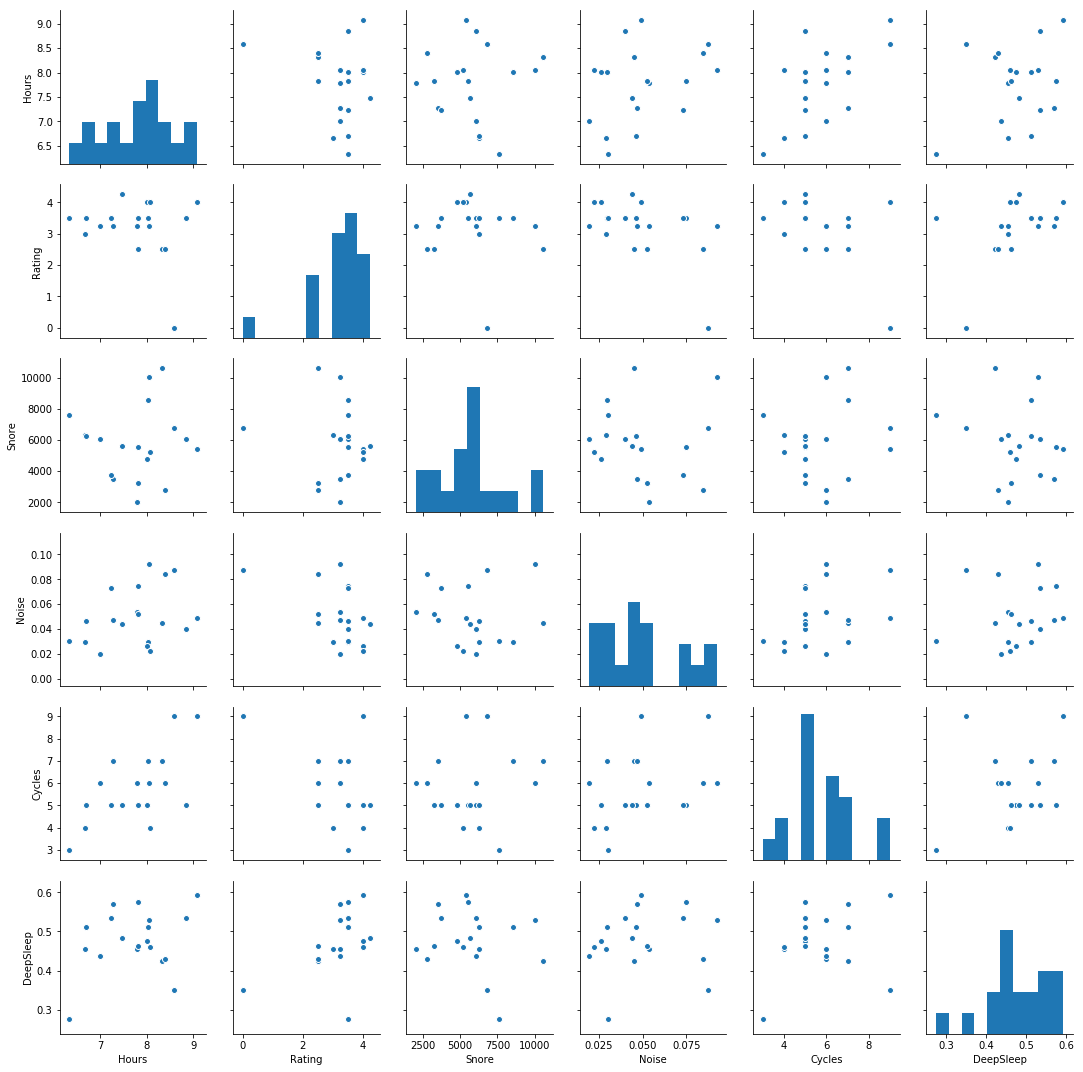

In [104]:
sns.pairplot(sleep)

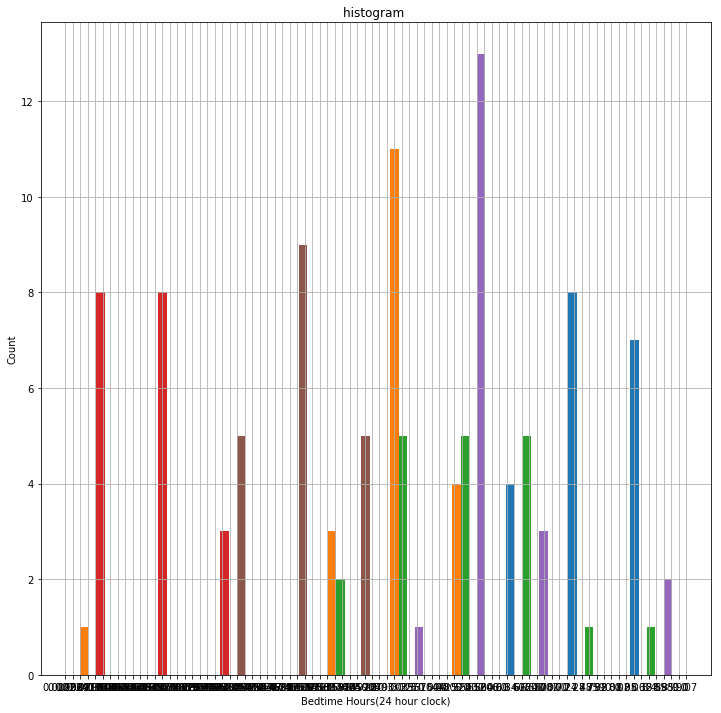

In [109]:
plt.figure(figsize=(12, 12))

plt.hist(sleep)
plt.xlabel('Bedtime Hours(24 hour clock)')
plt.ylabel('Count')
plt.title('histogram ')
plt.grid(True)
plt.show()